In [28]:
from sympy import *
import sympy
import math
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from IPython.display import display

## 设定展示格式

In [29]:
x, y, z = symbols('x y z')
init_printing(use_unicode=True)

In [3]:
syms = symbols('a0:5')
syms

## 1.运算与化简

### 展开式expand

In [8]:
expr = x + 2 * y
x * expr, expand(x * expr), factor(expand(x * expr))    #因式分解

In [5]:
expand((x + 1)*(x - 2) - (x - 1)*x)

指数展开

In [70]:
expand_log(log(x*y)), expand_log(log(x/y))

### 因式分解factor

In [15]:
factor(x**3 - x**2 + x - 1)

In [16]:
factor(x**2*z + 4*x*y*z + 4*y**2*z), factor_list(x**2*z + 4*x*y*z + 4*y**2*z)    #获取因式及次数

### 提取变量collect

In [13]:
expr = x*y + x - 3 + 2*x**2 - z*x**2 + x**3
expr, collect(expr, x)

In [64]:
collect(expr, x).coeff(x, 2)    #选取x^2的系数

### 化简为分数形式cancel

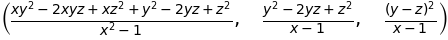

In [18]:
expr = (x*y**2 - 2*x*y*z + x*z**2 + y**2 - 2*y*z + z**2)/(x**2 - 1)
expr, cancel(expr), factor(expr)

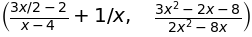

In [19]:
expr = 1/x + (3*x/2 - 2)/(x - 4)
expr, cancel(expr)

### apart展开为最简分式和

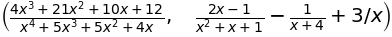

In [20]:
expr = (4*x**3 + 21*x**2 + 10*x + 12)/(x**4 + 5*x**3 + 5*x**2 + 4*x)
expr, apart(expr)

### 生成素数

In [12]:
sieve._reset()
display(sieve._list)
sieve.extend_to_no(10)
sieve._list

array('l', [2, 3, 5, 7, 11, 13])

array('l', [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31])

### 解方程组

In [46]:
linsolve([x + y + z - 1, x + y + 2*z - 3 ], (x, y, z))

## 2.输出效果

### 使用evalf()进行数值输出

In [4]:
expr = sqrt(8)
expr, expr.evalf()

In [24]:
pi.evalf(10)    #输出π小数点后10位

In [25]:
expr = cos(2 * x)
expr.evalf(subs = {x : 2.4})

In [45]:
one = cos(1) ** 2 + sin(1) ** 2
(one - 1).evalf(), (one - 1).evalf(chop=True)

### subs变量互换

In [51]:
expr = x ** 4 - 4 * x ** 3 + 4 * x ** 2 - 2 * x + 3
replacements = [(x ** i, y ** i) for i in range(5) if i % 2 == 0]
display(replacements)
expr, expr.subs(replacements)

使用list进行多变量替换

In [47]:
expr = x ** 3 + 4 * x * y - z
expr, expr.subs([(x, 2), (y, 4), (z, 0)])

### 展示等式

In [6]:
Eq(x + 1, 4)

衡量两个表达式是否结构相同

In [52]:
(x + 1) ** 2 == x ** 2 + 2 * x +1

False

使用simplify化简

In [58]:
a = (x + 1) ** 2
b = x ** 2 + 2 * x + 1
display(a, b, simplify(a - b))
c = x ** 2 - 2 * x + 1
c, simplify(a - c)

In [59]:
gamma(x), gamma(x - 2), simplify(gamma(x)/gamma(x - 2))

In [60]:
simplify(x**2 + 2*x + 1), factor(simplify(x**2 + 2*x + 1))

In [63]:
expr = sin(x) ** 4 - 2 * cos(x) ** 2 * sin(x) ** 2 + cos(x) ** 4
expr, trigsimp(expr)    #三角函数展开

用sympify将string转化为表达式

In [64]:
sympify("x ** 2 + 3 * x - 1 / 2")

### 判断表达式是否相等

In [66]:
a = cos(x) ** 2 - sin(x) ** 2
b = cos(2 * x)
display(a, b, a.equals(b))

True

### 格式化输出(分式)

In [43]:
Integer(1) / Integer(3)

In [68]:
Rational(1, 2), x + 1 / 2, x + Rational(1, 2)

## lambdify

In [36]:
a = np.arange(10)
expr = sin(x)
f = lambdify(x, expr, "numpy")
f(a)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

In [41]:
f = lambdify(x, expr, "math")
f(0.1)

In [72]:
def mysin(x):
     """
     My sine. Note that this is only accurate for small x.
     """
     return x
f = lambdify(x, expr, {"sin":mysin})
f(0.1)

## 导数与极限

### 求导

$sin(x)e^x$

In [7]:
diff(sin(x) * exp(x), x)

### 求极限

$\lim_{x\rightarrow0}x\cot{3x}$

In [7]:
limit((x * cot(3 * x)), x, 0)

$\lim_{x\rightarrow\infty}\frac{(x^3+x^2+1)(\sin{x}+\cos{x})}{2^x+x^3}$

In [21]:
limit((x ** 3 + x ** 2 + 1) / (2 ** x + x ** 3) * (sin(x) + cos(x)), x, oo)

$\lim_{x\rightarrow0}\frac{x^2\sin{\frac{1}{x}}+\sin{x}}{x}$

In [22]:
limit((x ** 2 * sin(1 / x) + sin(x)) / x, x, 0)

## 函数展开与级数

展开三角函数$sin(2x)+cos(2x)$

In [9]:
expr = sin(2 * x) + cos(2 * x)
expand_trig(expr)

使用subs进行替换

In [10]:
expr.subs(sin(2*x), 2*sin(x)*cos(x))

级数1：$\frac{1}{n^{2}} - \frac{1}{n}$
级数2：$\frac{n-100}{n}$

In [40]:
i, n = symbols('i n', integer = True)
expr1 = 1 / (n ** 2) - 1 / n
expr2 = (n - 100) / n
Sum(expr1, (n, 1, oo)).is_convergent(),Sum(expr2, (n, 1, oo)).is_convergent()

连乘收敛判定:$\prod_{i=1}^{n}\frac{n}{n+1}$

In [41]:
Product(n/(n + 1), (n, 1, oo)).is_convergent()

判定绝对收敛$\sum_{i=1}^\infty (-1)^n$与$\sum_{i=1}^\infty \frac{-1^n}{n^2}$

In [43]:
Sum((-1)**n, (n, 1, oo)).is_absolutely_convergent(),Sum((-1)**n/n**2, (n, 1, oo)).is_absolutely_convergent() #判定绝对收敛

$\sum_{n=1}^∞\frac{1}{n(n+1)(n+2)}$

In [6]:
expr = 1 / (n * (n + 1) * (n + 2))
Sum(expr,(n, 1, oo)).doit()

$\sum_{n=1}^∞\frac{1}{1(3n-2)(3n+1)}$

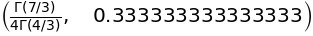

In [44]:
expr = 1 / ((3 * n - 2) * (3 * n + 1))
Sum(expr,(n, 1, oo)).doit(), Sum(expr,(n, 1, oo)).doit().evalf()

$\sum_{n=1}^∞\frac{n}{(n+1)!}$

In [12]:
expr = n / factorial(n + 1)    #阶乘
Sum(expr, (n, 1, oo)).doit()

$\sum_{n=1}^∞\prod_{i=1}^{n+1}\frac{2}{2^{i}+1}$

In [23]:
expr = 2 / (2 ** i + 1)
prod = Product(expr, (i, 1, n + 1))
sums = Sum(prod, (n, 1, oo))
sums.evalf()

#### 泰勒展开

In [27]:
expr = exp(sin(x))
display(expr)
expr.series(x, 0, 4)    #在0点四阶展开

In [28]:
x0 = symbols("x0")
expr.series(x, x0, 4)